In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## generated dataset

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                           n_classes=2, random_state=27, class_sep=0.5)

In [3]:
X[:10]

array([[-1.34811948, -0.75757546],
       [-1.11653353,  0.5731865 ],
       [ 1.33964928, -0.57558078],
       [ 0.39966044,  0.69632711],
       [-0.27426793, -0.15569413],
       [-1.1783773 ,  0.13769149],
       [-0.84837059, -0.6447522 ],
       [ 0.71126716,  0.21940367],
       [-0.65104234,  0.43995201],
       [-0.85938755,  1.0413922 ]])

In [4]:
y[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

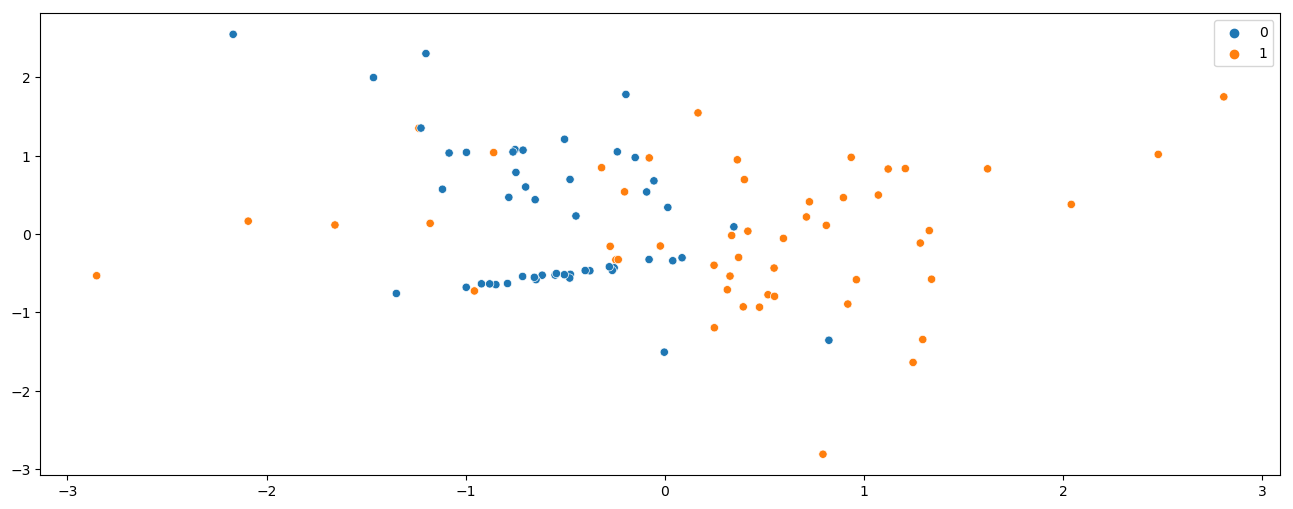

In [5]:
## checking data distribution

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=ax)

plt.show()

In [6]:
## structure

class LogisticRegression:
    
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr ## learning rate
        self.epochs = epochs
        self.m = None ## weight initialization
        self.b = None ## bias initialization
        
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        self.m = np.zeros(n_features)
        self.b = 0
        
        m_list = list()
        b_list = list()
        
        for _ in range(self.epochs):
            
            linear_preds = np.dot(X, self.m) + self.b
            preds = 1/(1 + np.exp(-linear_preds)) ## sigmoid

            dm = (2/n_samples)*np.dot(X.T, preds - y)
            db = (2/n_samples)*np.sum(preds - y)

            self.m = self.m - self.lr*dm
            self.n = self.b - self.lr*dm
            
            m_list.append(self.m)
            b_list.append(self.b)
            
        return np.stack(m_list), b_list
        
    
    def predict(self, X):
        
        linear_preds = np.dot(X, self.m) + self.b
        preds = 1/(1 + np.exp(-linear_preds)) ## sigmoid
        
        final = np.array([0 if pred<=0.5 else 1 for pred in preds])
        
        return final

In [7]:
## creating an instance of the LogisticRegression class

logreg = LogisticRegression(lr=0.01, epochs=5000)

In [8]:
## fitting the data

m_list, b_list = logreg.fit(X, y)

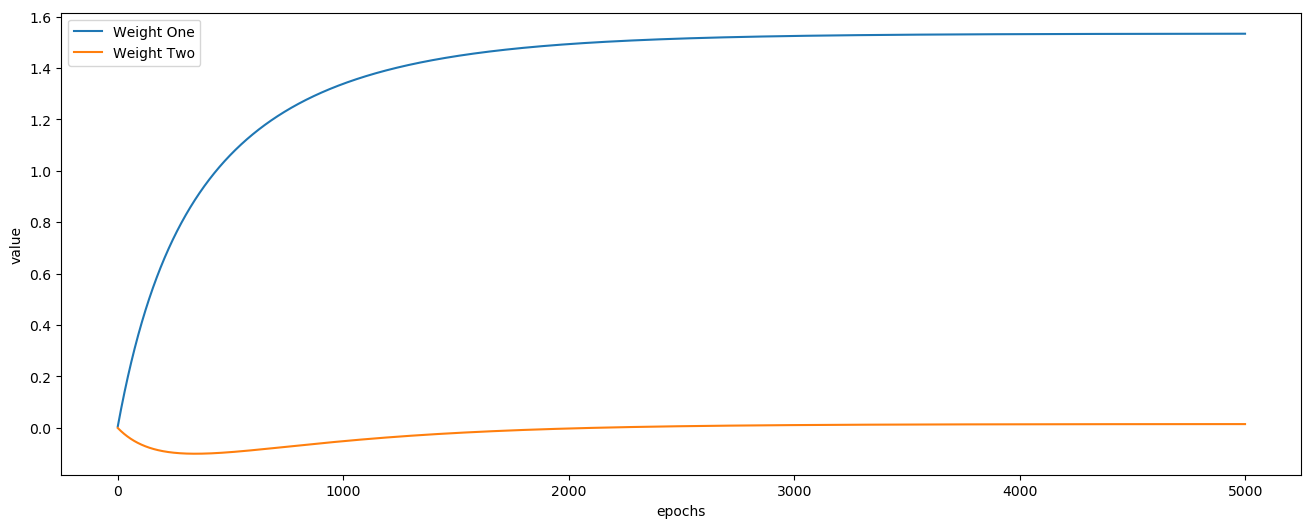

In [9]:
## plotting the weights against epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(m_list[:,0])
ax.plot(m_list[:,1])
ax.set_xlabel('epochs')
ax.set_ylabel('value')
ax.legend(['Weight One', 'Weight Two'])

plt.show()

In [10]:
## predictions

preds = logreg.predict(X)

In [11]:
preds

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

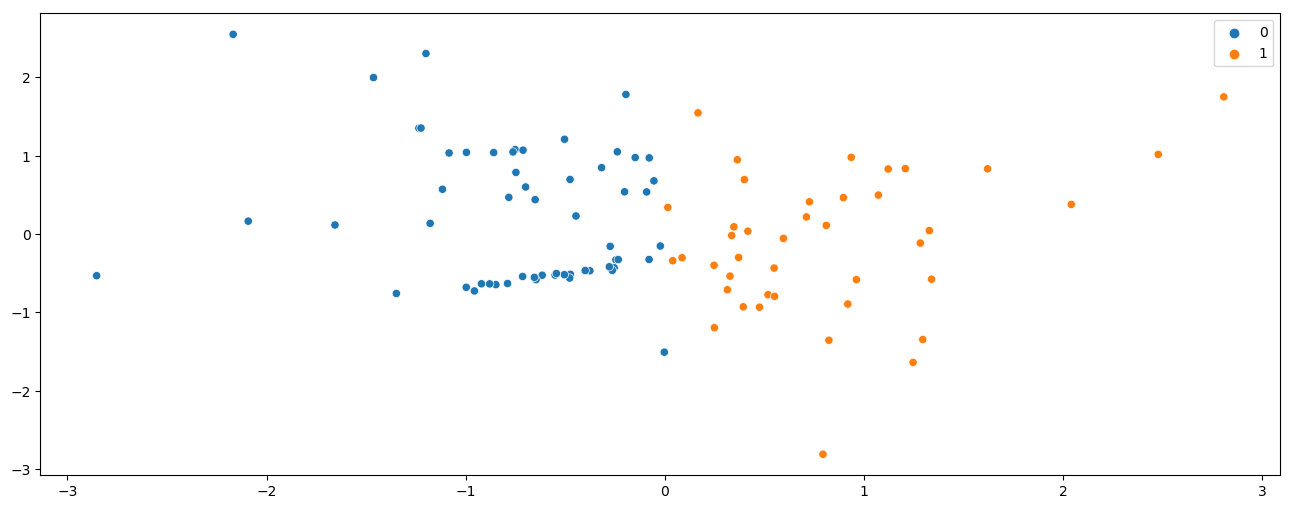

In [12]:
## visualizing predictions

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=preds, ax=ax)

plt.show()